In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib notebook

In [3]:
#Set up environemnt
import sys
#Append PLATUS libraries if these are not set in your PYTHONPATH 
#sys.path.append('/home/jl12e12/PLATUS/')
#sys.path.append('/home/jl12e12/PLATUS/fortran/lib/')
import lib_hipstar as lh
import tools
import lines as l
import numpy as np
import matplotlib.pyplot as plt
from matplotlib2tikz import save as tikz_save
tikz=True
pdf=True
import os

In [4]:
inlet_x=-0.5
outlet_x=1.1

# Load data

In [5]:
cd ~/HPT_500k/HPT_LS20_DOM80_TI5/convergence/

/mnt/drive2/re_500k/HPT_LS20_DOM80_TI5/convergence


In [6]:
cases=[]
labels=[]
convergencedir='./'
# now find all the stat-files and set the labels
dt=2.3*1.0e-05
root, dirs, files=next(os.walk(convergencedir))
for d in dirs:
#                self.filelist.append(os.getcwd()+'/'+convergencedir+'/'+d+'/STAT_cont.bin')
    cases.append(convergencedir+'/'+d+'/')
    temp=d.split('_')
    labels.append('%.2f - %.2f'%(float(temp[0])*dt,float(temp[2])*dt))
n_c=len(cases)
print cases
print labels

['.//5169101_to_5244101/', './/5103101_to_5139101/', './/4965101_to_5045101/']
['118.89 - 120.61', '117.37 - 118.20', '114.20 - 116.04']


In [7]:
cascades=[]
for i in range(n_c):
    filen=cases[i]+'/STAT_cont.bin'
    cascades.append(l.cascade_mean(inlet_x,outlet_x,filename=filen,infile='../cascade3d.in',Refplane='Outlet',chord=1.74
                                  ,HeatTransfer=True,label=labels[i].replace('_',' ')))

reading inlet and outlet
reading data from file previously extracted
reading data from file previously extracted
198
reading blade
extract line from (i,j) 224 1  to  224 672  in block  4 672
reading data from file previously extracted
3 i= 224
extract line from (i,j) 224 1  to  224 224  in block  3 224
reading data from file previously extracted
5 i= 224
extract line from (i,j) 224 1  to  224 672  in block  5 672
reading data from file previously extracted
7 i= 224
extract line from (i,j) 224 1  to  224 384  in block  7 384
reading data from file previously extracted


/home/rp3e11/codes/PLATUS/platus/lines.py:1383: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.tang!=None:
/home/rp3e11/codes/PLATUS/platus/lines.py:1386: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.plus_coords!=None:
/home/rp3e11/codes/PLATUS/platus/lines.py:1388: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.cf!=None:
/home/rp3e11/codes/PLATUS/platus/lines.py:1390: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.dist!=None:
/home/rp3e11/codes/PLATUS/platus/lines.py:2701: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.blade.dist!=None:
/home/rp3e11/codes/PLATUS/platus/lines.py:1523: FutureWarning: comparison to `None` will result in an elementwise object comparison in the futur

finished reading blade
len=1.57321798801
len=1.57321802527
dTdn [-107.64882081 -100.11813851  -98.9975292  -103.53372271 -111.49542529]
mu [  1.13555898e-05   1.13555898e-05   1.13555898e-05   1.13555898e-05
   1.13555898e-05]
extract line from (i,j) 1 1  to  1 672  in block  4 672
reading data from file previously extracted
extract line from (i,j) 223 1  to  223 672  in block  4 672
reading data from file previously extracted
extract line from (i,j) 222 1  to  222 672  in block  4 672
reading data from file previously extracted
extract line from (i,j) 224 1  to  224 672  in block  4 672
reading data from file previously extracted
extract line from (i,j) 1 1  to  1 224  in block  3 224
reading data from file previously extracted
extract line from (i,j) 223 1  to  223 224  in block  3 224
reading data from file previously extracted
extract line from (i,j) 222 1  to  222 224  in block  3 224
reading data from file previously extracted
extract line from (i,j) 224 1  to  224 224  in block 

In [16]:
cascades[-1].report_integral_mixed_out()

Isentropic Reynolds Number:    536698.75676
Isentropic Mach Number:    0.9172589931
Isentropic Reynolds Number:    544713.15363 (inlet mass averaged)
Isentropic Mach Number:    0.9172570631 (inlet mass averaged)
Isentropic exit Velocity:    5.6446765440
Mixed out loss    0.0353640557
Inlet angle:    0.0146291732
Inlet Mach number:    0.1484922782
Inlet stagnation pressure:   33.0131730317
Inlet stagnation Temperature:    1.8239916417
Inlet static pressure:   32.5086311922
Inlet static Temperature:    1.8159831716
Outlet angle:  -75.0172935397
Outlet Mach number:    0.9035794546
Outlet stagnation pressure:   32.5230920887
Outlet stagnation Temperature:    1.8159080248
Outlet static pressure:   19.1550073661
Outlet static Temperature:    1.5610090385
Outlet density:    0.6871711733


# Plot cascae quantities

## Inlet profiles

<IPython.core.display.Javascript object>


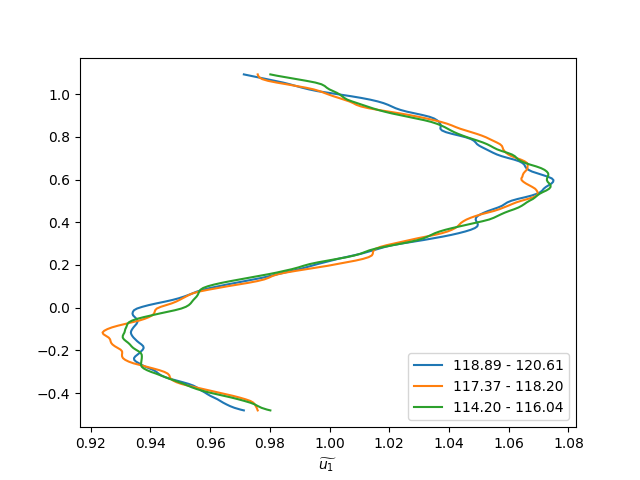

<IPython.core.display.Javascript object>


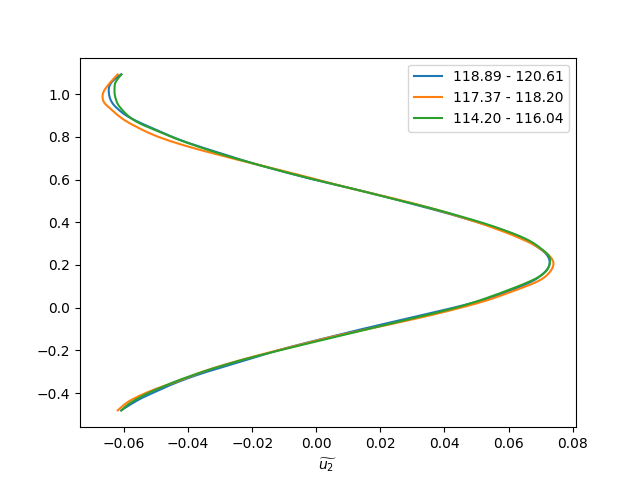

<IPython.core.display.Javascript object>


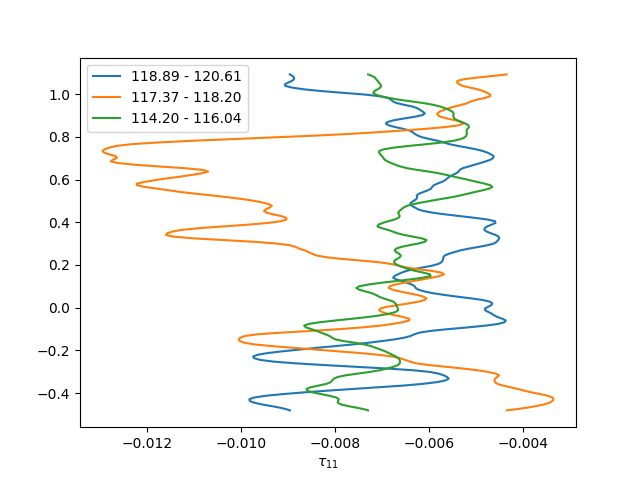

<IPython.core.display.Javascript object>


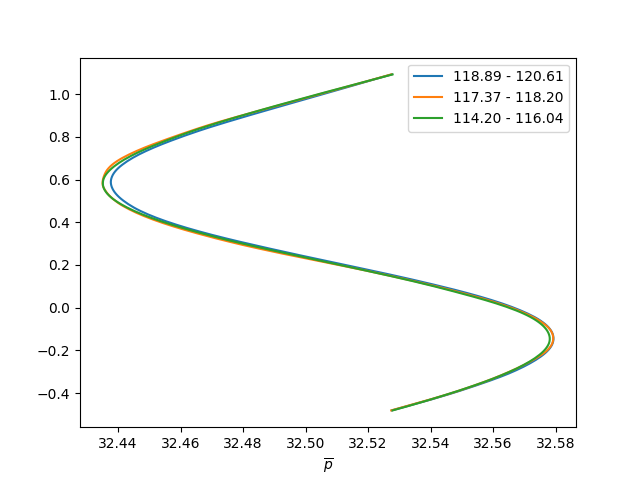

In [11]:
ids=[]
ids.append(cascades[0].header.get_index(101,2))
ids.append(cascades[0].header.get_index(101,3))
ids.append(cascades[0].header.get_index(101,10))
ids.append(cascades[0].header.get_index(101,5))
for i,val in enumerate(ids):
    plt.figure()
    for j in range(n_c):
        plt.plot(cascades[j].inlet.data[:,val],cascades[j].inlet.data[:,1],label=cascades[j].label)
    plt.legend()
    plt.xlabel(cascades[j].header.vars[val])

In [9]:
inlet_stream=l.lines(convergence=True,convergencedir='./')

In [10]:
inlet_stream.extr_line([-1.0,0.0],[-0.2,0.0],300)

Extracting line
Found 300 points.
Extracting line
Found 300 points.
Extracting line
Found 300 points.


<IPython.core.display.Javascript object>


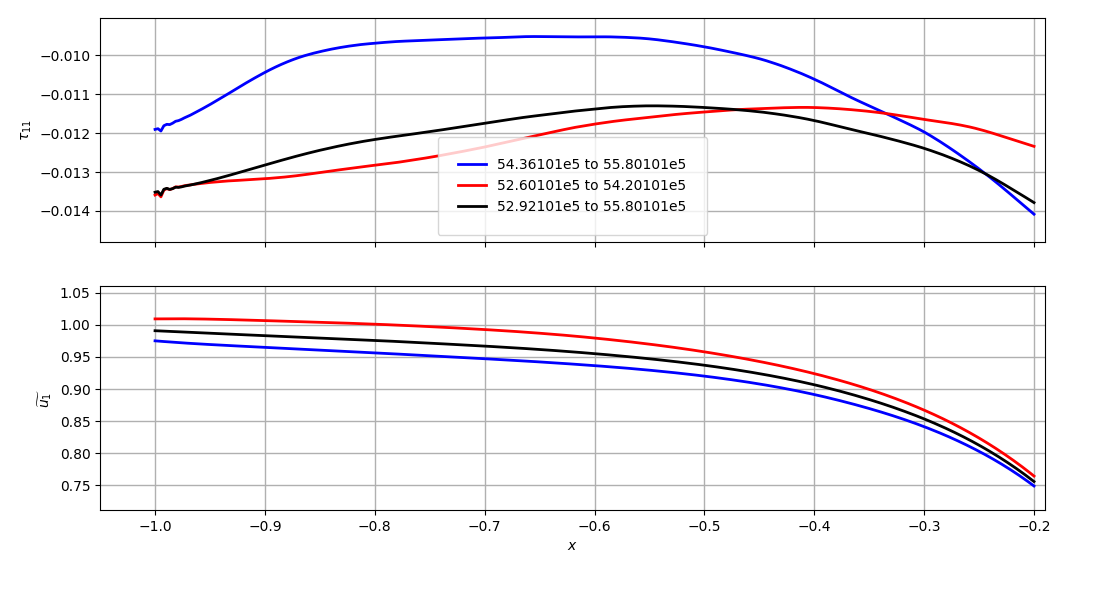

<IPython.core.display.Javascript object>


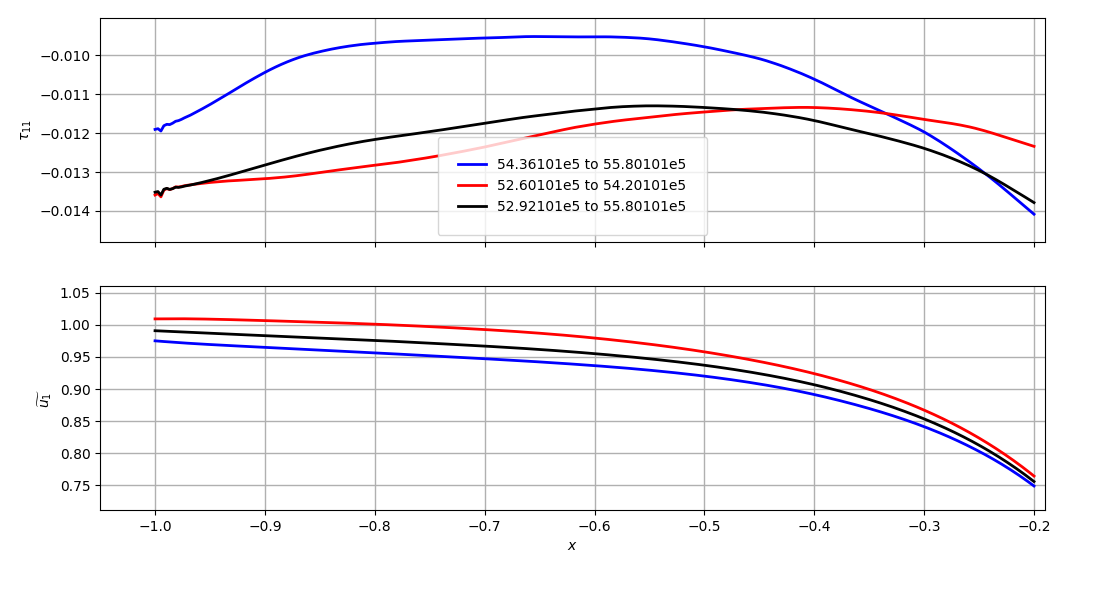

In [11]:
pl_var=[]
pl_var.append(inlet_stream.l[0].var.get_index(101,10))
pl_var.append(inlet_stream.l[0].var.get_index(101,2))
inlet_stream.plot_var([0],pl_var)

# Blade Profiles

<IPython.core.display.Javascript object>


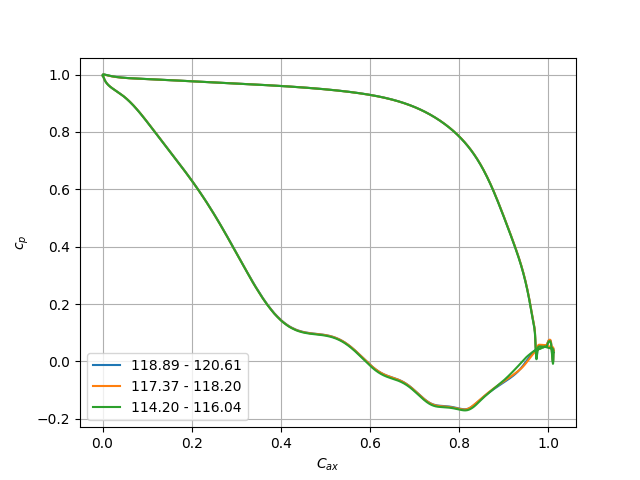

In [12]:
plt.figure()
for i in range(n_c):
    plt.plot(cascades[i].blade.data[:,0],cascades[i].cp,label=cascades[i].label)
plt.grid()
plt.legend()
plt.xlabel('$C_{ax}$')
plt.ylabel('$c_p$')

<IPython.core.display.Javascript object>


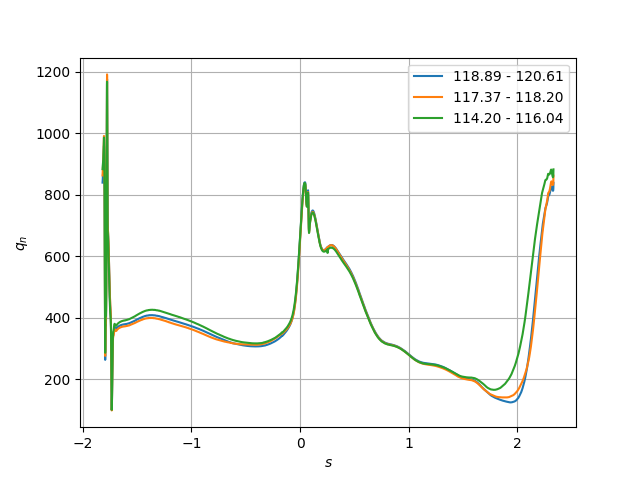

In [13]:
plt.figure()
for i in range(n_c):
    plt.plot(cascades[i].blade.dist[:],cascades[i].qnorm2,label=cascades[i].label)
plt.grid()
plt.legend()
plt.xlabel('$s$')
plt.ylabel('$q_{n}$')

## Outlet region

<IPython.core.display.Javascript object>


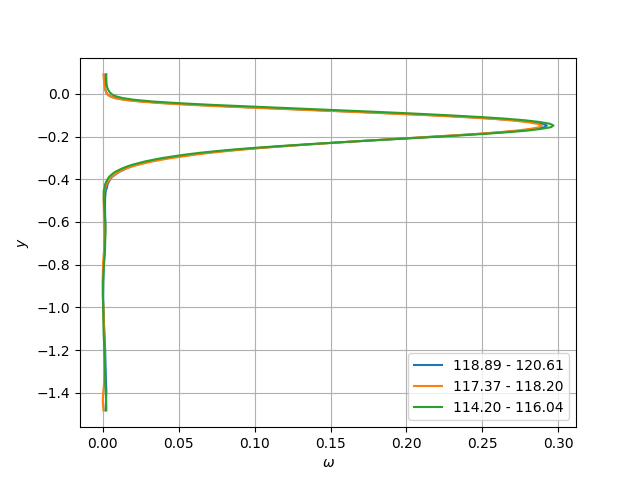

In [14]:
plt.figure()
for i in range(n_c):
    plt.plot(cascades[i].loss_mix[:],cascades[i].outlet.data[:,1],label=cascades[i].label)
plt.grid()
plt.legend(loc=0)
plt.xlabel('$\omega$')
plt.ylabel('$y$')

In [9]:
for case_i in cascades:
    case_i.extr_bl_quantities(nps_stream=100,nps_wall_norm=200,extent=0.05,f_ss_start=0.05,f_ss_end=0.95
                           ,f_ps_start=0.02,f_ps_end=0.98)

<IPython.core.display.Javascript object>


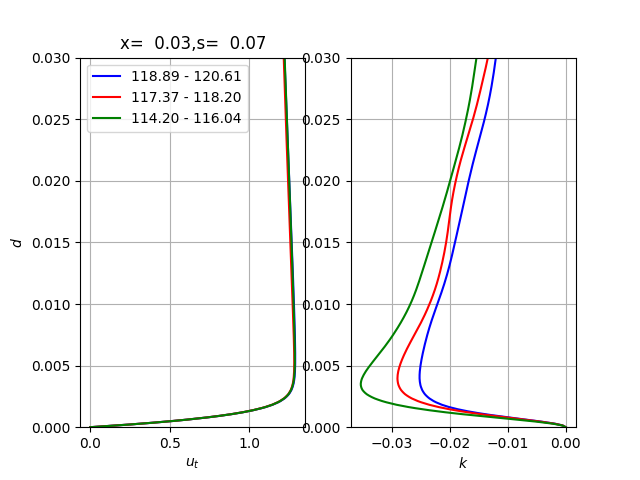

file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}


/usr/local/lib/python2.7/dist-packages/matplotlib/artist.py:233: MatplotlibDeprecationWarning: get_axes has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  stacklevel=1)


<IPython.core.display.Javascript object>


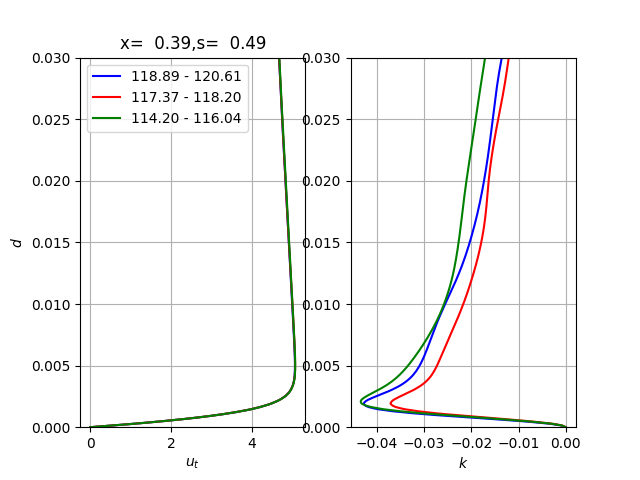

file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}


<IPython.core.display.Javascript object>


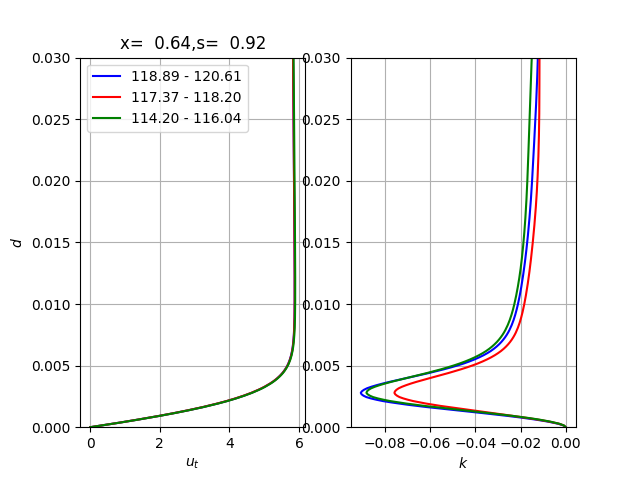

file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}


<IPython.core.display.Javascript object>


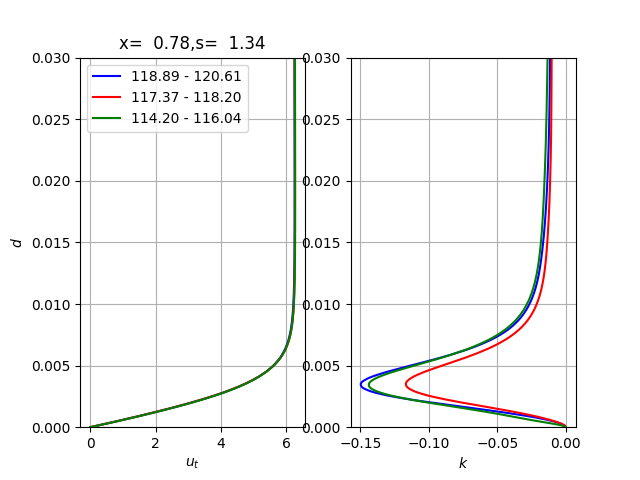

file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}


<IPython.core.display.Javascript object>


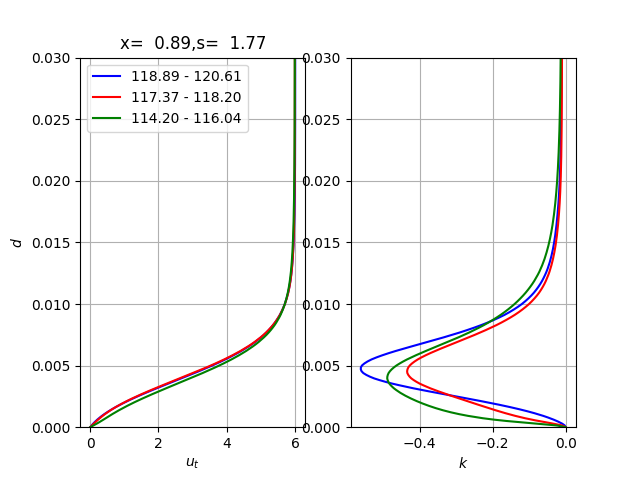

file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}


In [10]:
colors=['b','r','g','k','brown','m']
for j in range(0,100,20):
    plt.figure()
    plt.subplot(1,2,1)
    j_w=5
    plt.title('x=%6.2f,s=%6.2f'%(cascades[0].bl_ss_wall_norm[0,0,j],cascades[0].bl_ss_wall_norm[2,0,j]-0.05))
    for ic in range(3):
        plt.plot(cascades[ic].bl_ss_wall_norm[3,:,j],cascades[ic].bl_ss_wall_norm[1,:,j],label=labels[ic],color=colors[ic])
    plt.grid()
    plt.ylim([0,0.03])
    plt.legend(loc=0)
    plt.xlabel('$u_t$')
    plt.ylabel('$d$')
    plt.subplot(1,2,1)
    j_w=5
    plt.subplot(1,2,2)    
    for ic in range(3):
        plt.plot(-cascades[ic].bl_ss_wall_norm[12,:,j],cascades[ic].bl_ss_wall_norm[1,:,j],label=labels[ic],color=colors[ic])
    plt.grid()
    plt.ylim([0,0.03])
    plt.xlabel('$k$')
    tikz_save('vel_k_prof_%i.tikz'%j,figureheight='\\figureheight',figurewidth='\\figurewidth')